## Importaciones

In [230]:
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [231]:
from src.exploring_functions import *

In [232]:
medidas1 = pd.read_csv('./data/measurements.csv',sep=',',decimal=',')
medidas2 = pd.read_excel('./data/measurements2.xlsx')

## Infomación general de los datos

In [233]:
medidas1.equals(medidas2)

True

Los dos dataframes son iguales, por lo que nos quedamos solo con uno.

In [234]:
medidas = medidas1.copy()

In [235]:
medidas.shape

(388, 12)

In [236]:
medidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [237]:
medidas.describe().T

,count,mean,std,min,25%,50%,75%,max
distance,388.0,19.652835,22.667837,1.3,11.80,14.6,19.0,216.1
consume,388.0,4.912371,1.033172,3.3,4.30,4.7,5.3,12.2
speed,388.0,41.927835,13.598524,14.0,32.75,40.5,50.0,90.0
temp_inside,376.0,21.929521,1.010455,19.0,21.50,22.0,22.5,25.5
temp_outside,388.0,11.358247,6.991542,-5.0,7.00,10.0,16.0,31.0
AC,388.0,0.077320,0.267443,0.0,0.00,0.0,0.0,1.0
rain,388.0,0.123711,0.329677,0.0,0.00,0.0,0.0,1.0
sun,388.0,0.082474,0.275441,0.0,0.00,0.0,0.0,1.0
refill liters,13.0,37.115385,8.587282,10.0,37.60,38.0,39.0,45.0


Como se puede observar, las columnas 'distance', 'consume', 'temp_inside' deberían ser tipo float y están como tipo object.

In [238]:
medidas.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [239]:
medidas.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

## Estudio de columnas específicas

Ahora se van a estudiar las columnas de refill, que tienen una gran cantidad de nulos

In [240]:
medidas[medidas['refill gas'].notnull()]

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
44,5.4,3.3,32,21.5,7,NaN,SP98,0,0,0,37.6,SP98
82,10.5,3.6,42,20.0,10,NaN,SP98,0,0,0,37.7,SP98
106,162.7,5.5,75,23.0,1,NaN,SP98,0,0,0,45.0,SP98
139,16.1,5.4,24,21.5,7,rain,E10,0,1,0,38.0,E10
171,44.4,4.8,38,21.5,8,NaN,E10,0,0,0,38.3,E10
191,43.7,4.7,44,22.0,9,half rain half sun,SP98,0,1,0,10.0,SP98
192,12.1,4.2,43,22.0,4,NaN,SP98,0,0,0,39.0,SP98
234,19.0,4.5,29,22.5,10,NaN,E10,0,0,0,39.0,E10
274,25.7,4.9,50,22.0,10,rain,SP98,0,1,0,41.0,SP98


Como se puede comprobar, la columnas refill gas solo tiene 13 valores no nulos y todos ellos son iguales a la columna gas_type por lo que no aporta información adicinal.

In [241]:
medidas[medidas['refill liters'].notnull()]

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
44,5.4,3.3,32,21.5,7,NaN,SP98,0,0,0,37.6,SP98
82,10.5,3.6,42,20.0,10,NaN,SP98,0,0,0,37.7,SP98
106,162.7,5.5,75,23.0,1,NaN,SP98,0,0,0,45.0,SP98
139,16.1,5.4,24,21.5,7,rain,E10,0,1,0,38.0,E10
171,44.4,4.8,38,21.5,8,NaN,E10,0,0,0,38.3,E10
191,43.7,4.7,44,22.0,9,half rain half sun,SP98,0,1,0,10.0,SP98
192,12.1,4.2,43,22.0,4,NaN,SP98,0,0,0,39.0,SP98
234,19.0,4.5,29,22.5,10,NaN,E10,0,0,0,39.0,E10
274,25.7,4.9,50,22.0,10,rain,SP98,0,1,0,41.0,SP98


La columna 'refill liters' no tiene más que 13 valores no nulos.

Ahora se va  estudiar la columna specials, que tiene una gran cantidad de nulos

In [242]:
medidas[medidas.specials.notna()]

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
40,12.4,4.0,55,21.5,7,AC rain,E10,1,1,0,NaN,NaN
41,4.5,5.0,29,21.5,7,AC,E10,1,0,0,NaN,NaN
50,11.8,5.1,29,21.5,5,rain,SP98,0,1,0,NaN,NaN
53,13.1,6.1,46,21.5,6,rain,SP98,0,1,0,NaN,NaN
55,153.5,4.9,82,21.5,3,rain,SP98,0,1,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
381,5.5,3.7,33,24.5,28,sun,SP98,0,0,1,NaN,NaN
382,13.6,3.7,33,24.5,28,sun,SP98,0,0,1,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [243]:
medidas.specials.value_counts()

rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: specials, dtype: int64

In [244]:
print(medidas[(medidas.sun==0) & (medidas.specials.str.contains('sun', na=False))] [["specials","sun"]])
print('***********')
print(medidas[(medidas.AC==0) & (medidas.specials.str.contains('AC|ac', na=False))] [["specials","AC"]])
print('***********')
print(medidas[(medidas.rain==0) & (medidas.specials.str.contains('rain', na=False))] [["specials","sun"]])

               specials  sun
191  half rain half sun    0
***********
    specials  AC
334       ac   0
***********
Empty DataFrame
Columns: [specials, sun]
Index: []


Se comprueba que la columna specials contiene practicamente la misma informacion que las columnas "AC", "rain" y "sun". El único dato que aporta a mayores es "snow"

<AxesSubplot:>

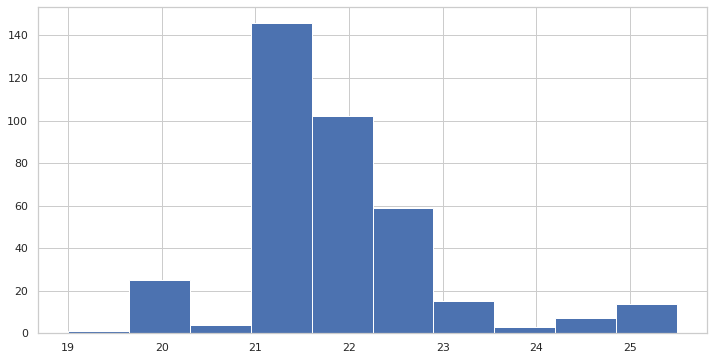

In [245]:
medidas.temp_inside.hist()

<AxesSubplot:>

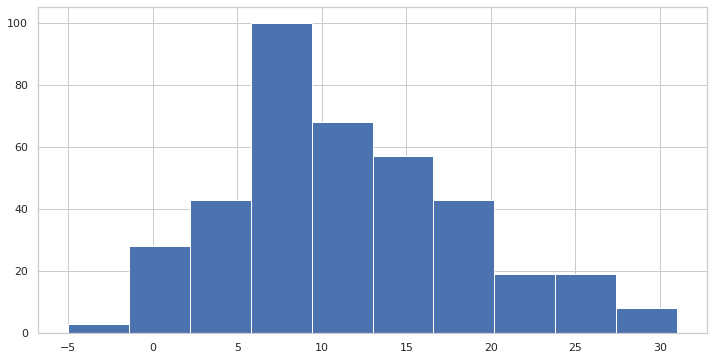

In [246]:
medidas.temp_outside.hist()

## Limpieza de columnas

Se van a eliminar aquellas columnas que no aportan información:
- refill gas: porque todos sus valores no nulos son iguales a gas_type
- refill liters: la mayoria de los valores son nulos y el objetivo es seleccionar el mejor tipo de combustible, por lo que los litros rellenados en el trayecto no aportan información relevante

In [247]:
medidas.drop(columns=['refill gas','refill liters'],inplace=True)

Ahora se va a hacer un get dummies de la columna special para sacar la columna "snow" y se van a corregir las diferencias con las columnas "sun", "AC y "rain" en aquellas filas donde no coincidan. Por último se va a eliminar la columna "specials".

In [248]:
medidas.specials.value_counts()

rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: specials, dtype: int64

In [249]:
for i in medidas[(medidas.sun==0) & (medidas.specials.str.contains('sun', na=False))].index:
    medidas.loc[i, "sun"]=1

for i in medidas[(medidas.AC==0) & (medidas.specials.str.contains('AC|ac', na=False))].index:
    medidas.loc[i, "AC"]=1

for i in medidas[(medidas.rain==0) & (medidas.specials.str.contains('rain', na=False))].index:
    medidas.loc[i, "rain"]=1

medidas['snow'] = 0
for i in medidas[medidas.specials.str.contains('snow', na=False)].index:
    medidas.loc[i, "snow"]=1

medidas.drop(columns=['specials'],inplace=True)

Ahora se va a hacer la transformación de las columnas object que deberían ser float

In [250]:
for e in ['distance', 'consume', 'temp_inside']:
    # Lo primero es cambiar las ',' por '.' para poder hacer la transformación
    medidas[e] = medidas[e].apply(lambda x : str(x).replace(',', '.'))
    # Ahora hay que cambiar el tipo de columa
    medidas[e] = medidas[e].astype(float)

In [251]:
medidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   376 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    object 
 6   AC            388 non-null    int64  
 7   rain          388 non-null    int64  
 8   sun           388 non-null    int64  
 9   snow          388 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 30.4+ KB


Las columnas ya tienen el tipo de dato adecuado, ahora se puede seguir con la limpieza de la columna 'temp_inside' que es la única con nulos, pero como solo hay 12 valores nulos de 388, son una cantidad pequeña y se van a eliminar

In [252]:
medidas.dropna(inplace=True)

Se va a crear una nueva columna que almacene la diferencia de temperatura exterior e interior del vehículo, ya que parece un dato relevante.

In [253]:
medidas['temp_difference']= medidas.apply(lambda x: x.temp_outside - x.temp_inside, axis=1)

Se cambian a minusculas todos los nombres de columnas del dataframe

In [254]:
nuevas_columna = {columna:(columna.replace(" ", "_").replace(".", "_").lower()) for columna in list(medidas.keys())}
medidas.rename(columns=nuevas_columna, inplace=True)

Ahora ya está el dataframe limpio, por lo que se van a exportar los datos

In [255]:
medidas.to_csv("./data/measurements_clean.csv",index=False)

In [256]:
medidas = pd.read_csv('./data/measurements_clean.csv')
donwcast_df(medidas, verbose=0)

## Visualizaciones

Se va a comprobar si están o no balanceados los datos en función del combustible

El porcentaje de datos con gas_type_E10 es: 0.4175531914893617
El porcentaje de datos con gas_type_SP98 es: 0.5824468085106383


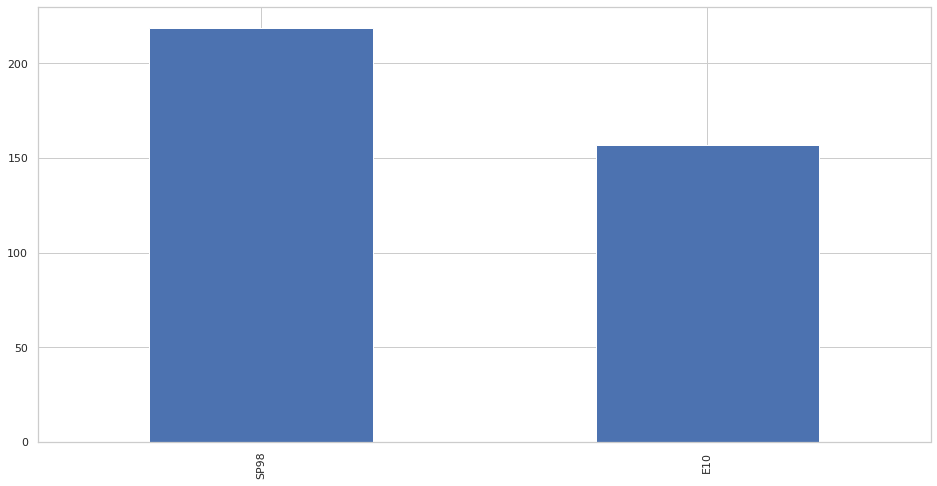

In [257]:
medidas.gas_type.value_counts().plot(kind='bar', figsize=(16,8));
print('El porcentaje de datos con gas_type_E10 es:', len(medidas[medidas.gas_type=="E10"].index)/medidas.shape[0])
print('El porcentaje de datos con gas_type_SP98 es:', len(medidas[medidas.gas_type=="SP98"].index)/medidas.shape[0])

Se va a estudiar la correación de la columna consumo

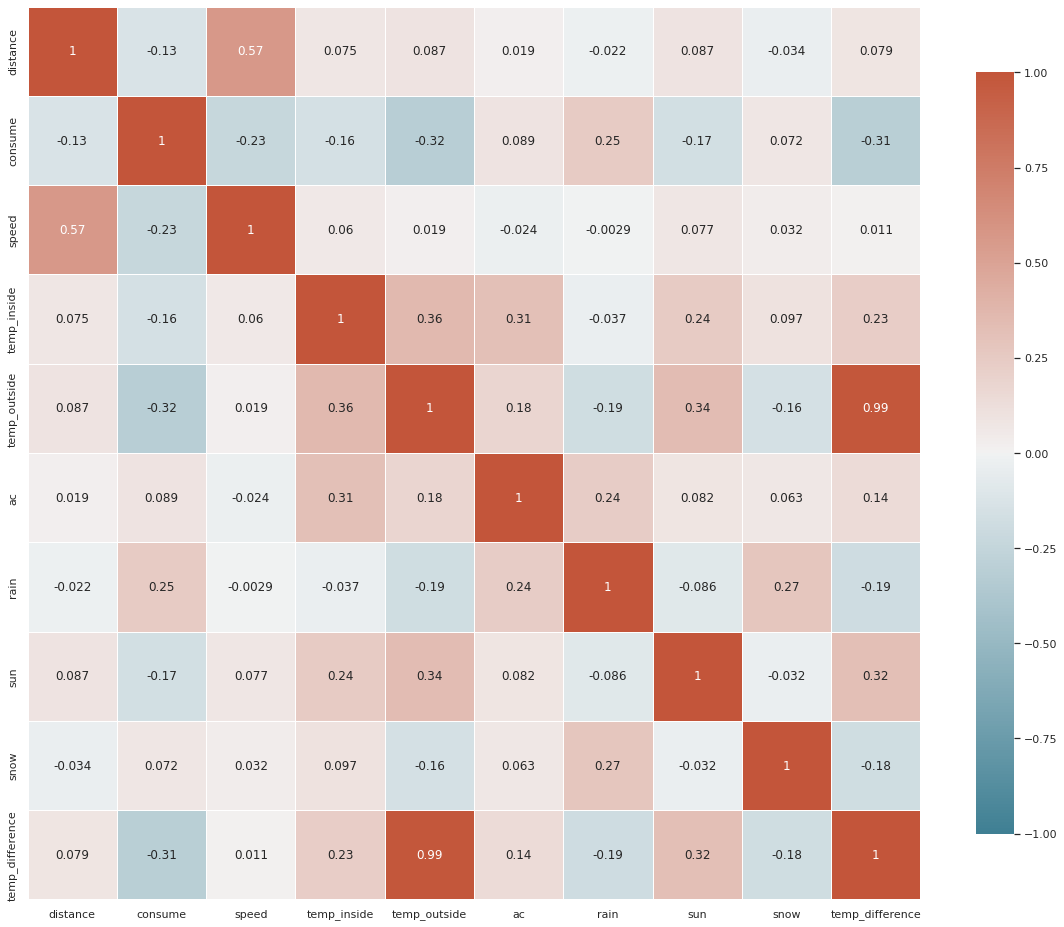

In [258]:
plt.figure(figsize=(20,20)) 

color_map = sns.diverging_palette(220, 20, as_cmap=True) # Paleta de colores

sns.heatmap(medidas.corr(),  
            cmap=color_map,
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            vmin=-1,
            annot=True,
            cbar_kws={"shrink": .7
                     },# barra lateral
            xticklabels=True,
            yticklabels=True
);

/home/rodrigo/miniconda3/envs/ironhack/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


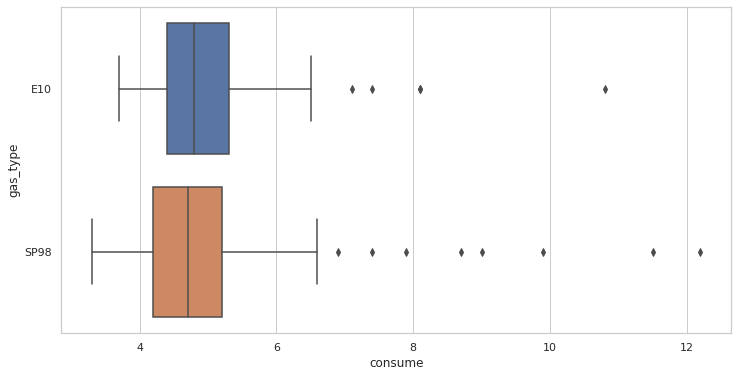

In [259]:
sns.boxplot(medidas.consume,medidas.gas_type);

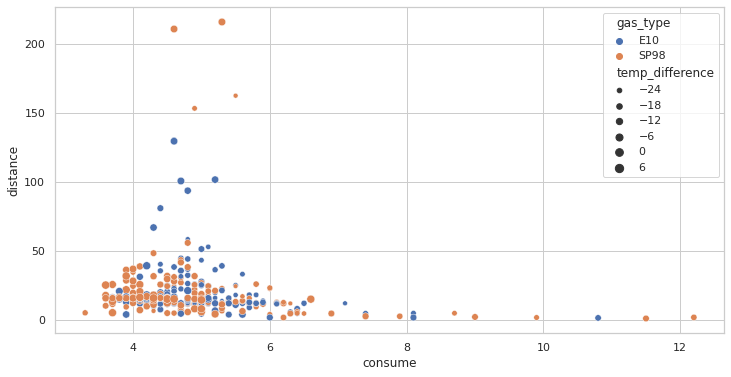

In [260]:
sns.scatterplot(x="consume", y="distance", hue='gas_type', size = 'temp_difference', data=medidas);

Se puede ver un alto consumo para muchos trayectos con poca distancia. Suponiendo que los datos de consumo son de l/km estos datos son para consumos en reposo. Debido a esto se van a eliminar los datos de trayectos con consumos por encima de 6.5 l/km

In [261]:
medidas.drop(medidas[(medidas['consume'] >6.5)].index, inplace=True)

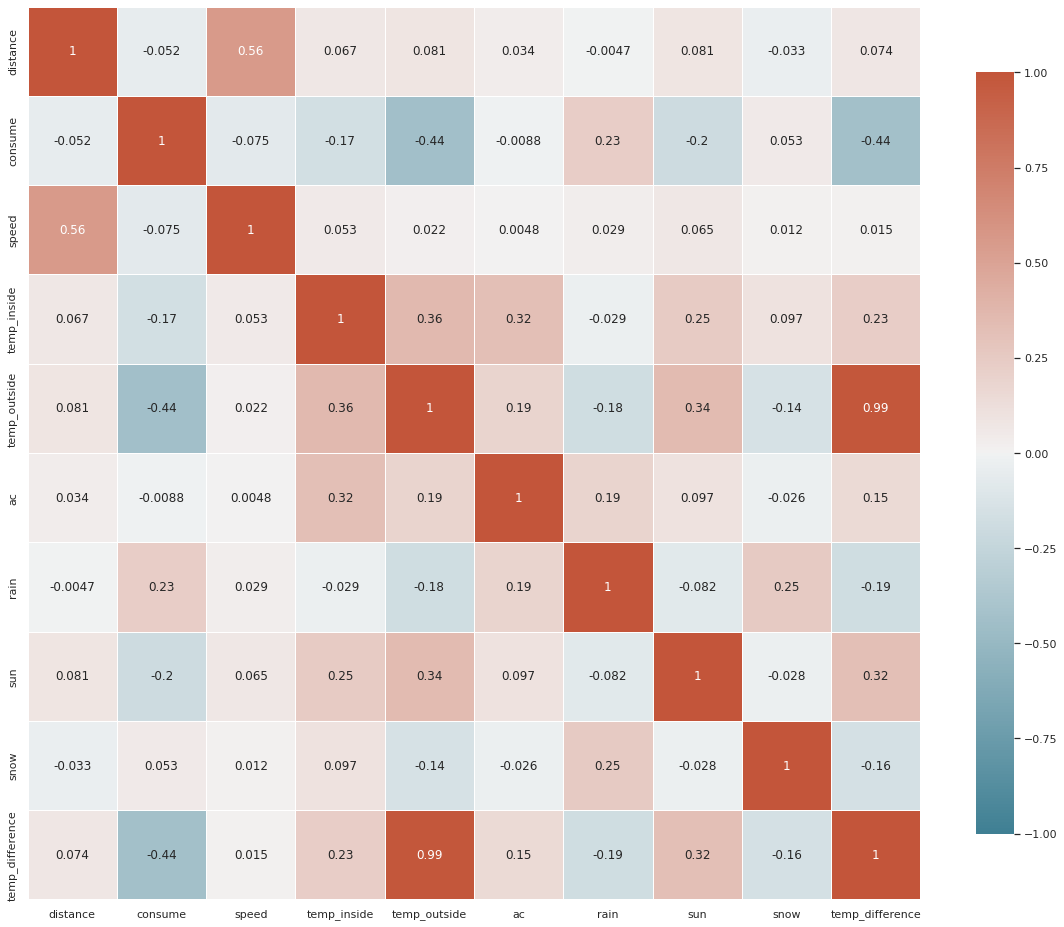

In [262]:
plt.figure(figsize=(20,20)) 

color_map = sns.diverging_palette(220, 20, as_cmap=True) # Paleta de colores

sns.heatmap(medidas.corr(),  
            cmap=color_map,
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            vmin=-1,
            annot=True,
            cbar_kws={"shrink": .7
                     },# barra lateral
            xticklabels=True,
            yticklabels=True
);

Según se puede observar en la matriz de correlación; parece haber una correción positiva entre la temperatura exterior y el consumo de gasolina

/home/rodrigo/miniconda3/envs/ironhack/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


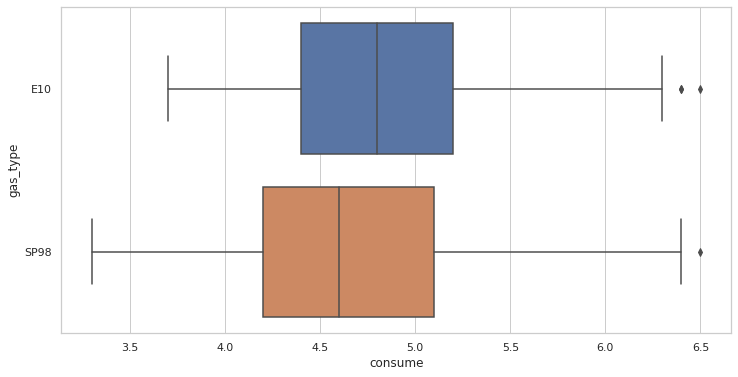

In [263]:
sns.boxplot(medidas.consume,medidas.gas_type);

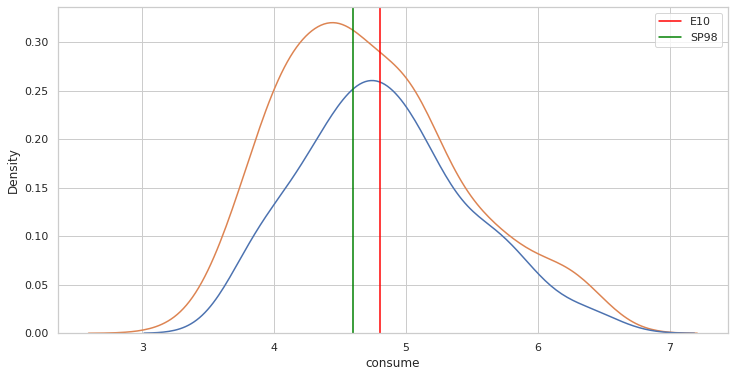

In [264]:
E10 = medidas[medidas.gas_type == 'E10']
SP98 = medidas[medidas.gas_type == 'SP98']
graf = sns.kdeplot(x=medidas.consume, hue=medidas.gas_type)
graf.axvline(x=E10.consume.median(), c="red", label="E10")
graf.axvline(x=SP98.consume.median(), c="green", label="SP98")
plt.legend();

Tal y como parecen indicar el boxplot y la gráfica de densidad, el consumo de los coches con "E10" es mayor que el de los coches con "SP98"